In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime as dt
import glob
import os
import datetime as dt
import matplotlib.pyplot as plt
import pylab
import scipy.optimize as optimize

In [3]:
data = pd.read_csv('C:/Users/Rocku/Downloads/btcnCNY.csv')


In [7]:
data.describe()

,1307942004,150.000000000000,1.000000000000
count,6.634816e+06,6.634816e+06,6.634816e+06
mean,1.389225e+09,4.150735e+03,1.007247e+00
std,9.956811e+06,1.704927e+03,3.550520e+00
min,1.307943e+09,1.000000e+01,0.000000e+00
25%,1.385488e+09,3.189097e+03,2.000000e-02
50%,1.386793e+09,4.051020e+03,1.500000e-01
75%,1.395455e+09,5.386000e+03,8.000000e-01
max,1.407414e+09,7.588880e+03,7.580000e+02


In [4]:
data = pd.read_csv('C:/Users/Rocku/Downloads/btcnCNY.csv')
data['date'] = pd.to_datetime(data['date'])

data_within = data[(data['date'] >= dt.datetime(2013,4,1)) & (data['date'] <= dt.datetime(2015,2,25))]
data_within.index = data_within['date']
data_within.set_index('date',inplace=True, drop=True)
data_within = data_within.groupby(pd.TimeGrouper('5Min')).last()
data_within.head()

OSError: File b'C:/Users/Rocku/Downloads/btcnCNY.csv' does not exist

In [ ]:
data = pd.read_csv('usd/btcnCNY.csv', date_parser=['date'])

# Extract 5min interval price and volume (April 1st 2013–February 25th 2014)

In [8]:
files = ['usd/mtgoxUSD.csv',
         'usd/btceUSD.csv',
         'usd/bitstampUSD.csv',
         'usd/bitfinexUSD.csv',
        ]

In [9]:
success = 0
failed = 0
failed_name = []

for i, file in enumerate(files):
    print(file)
    try:
        data = pd.read_csv(file, date_parser=['date'])
        data['date'] = pd.to_datetime(data['date'])
        
        data_within = data[(data['date'] >= dt.datetime(2013,4,1,0,5,0)) & (data['date'] <= dt.datetime(2014,2,25))]
        data_within.sort_values(by='date', inplace=True, ascending=False)

        data_within.set_index('date',inplace=True, drop=True)
        data_within = data_within.groupby(pd.TimeGrouper('5Min')).last()
        data_within.to_csv('dated/'+ file.split('/')[-1], header='column_names', encoding='utf-8')
        
        del data, data_within
    except:
        failed += 1
        failed_name.append(file)
        print('failed : ', file)
        
print('end')
#     data.rename(columns={0:'date', 1:'price', 2:'volume'}, inplace=True)
#     data['date'] = pd.to_datetime(data['date'],unit='s')

usd/mtgoxUSD.csv


C:\Users\Rocku\Anaconda64\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


usd/btceUSD.csv
usd/bitstampUSD.csv
usd/bitfinexUSD.csv
end


## concat three exchanges data

In [13]:
files = ['dated/mtgoxUSD.csv',
         'dated/btceUSD.csv',
         'dated/bitstampUSD.csv',
         'dated/bitfinexUSD.csv']

In [14]:
df_full = pd.DataFrame()

for i, file in enumerate(files):
    print(i,file)
    data = pd.read_csv(file, date_parser=['date'], index_col=None)
    data['date'] = pd.to_datetime(data['date'])
    data.sort_values(by='date', inplace=True, ascending=False)
    data['price'].fillna(method='ffill', inplace=True)
    data['volume'].fillna(value=0, inplace=True)

    data.rename(columns={
            'price': 'p_'+file.split('/')[-1].split('.')[0],
            'volume': 'v_'+file.split('/')[-1].split('.')[0]}, inplace= True)
    if i == 0:
        df_full = data
    else:
        df_full = pd.merge(left=df_full, right=data, on='date', how='outer')
#     del data

print('end')
#     data.rename(columns={0:'date', 1:'price', 2:'volume'}, inplace=True)
#     data['date'] = pd.to_datetime(data['date'],unit='s')

0 dated/mtgoxUSD.csv
1 dated/btceUSD.csv
2 dated/bitstampUSD.csv
3 dated/bitfinexUSD.csv
end


In [15]:
df_full.to_csv('dated/four_exc.csv', header='column_names', encoding='utf-8', index=False)

# Load three exchanges data

In [53]:
file = 'dated/four_exc.csv'

data = pd.read_csv(file, date_parser=['date'])
data['date'] = pd.to_datetime(data['date'])
data.sort_values(by='date', inplace=True, ascending=False)


### p1 : mtgox
### p2 : btce
### p3 : bitstamp
### p4 : bitfinex

new_column={'p_mtgoxUSD': 'p1',
            'p_btceUSD':'p2', 
            'p_bitstampUSD':'p3',
            'p_bitfinexUSD':'p4',
            'v_mtgoxUSD': 'v1', 
            'v_btceUSD':'v2', 
            'v_bitstampUSD':'v3',
            'v_bitfinexUSD':'v4' }

data.rename(columns=new_column, inplace= True)

data['p1'] = np.log(data['p1'])
data['p2'] = np.log(data['p2'])
data['p3'] = np.log(data['p3'])
data['p4'] = np.log(data['p4'])


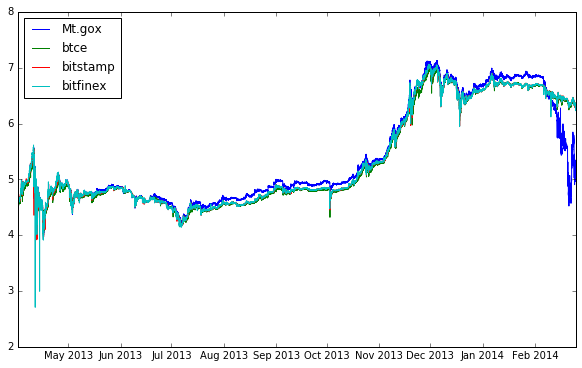

In [55]:
plt.figure(figsize=(10,6))
plt.plot(data['date'],data['p1'])
plt.hold()
plt.plot(data['date'],data['p2'])
plt.plot(data['date'],data['p3'])
plt.plot(data['date'],data['p4'])



plt.legend(['Mt.gox', 'btce','bitstamp','bitfinex'],loc=0)

(0, 500)

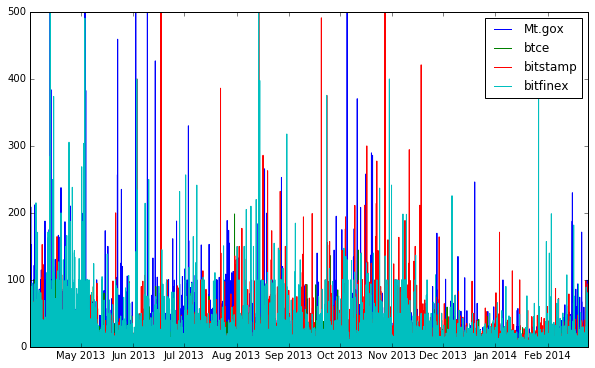

In [57]:
plt.figure(figsize=(10,6))
plt.plot(data['date'],data['v1'])
plt.hold()
plt.plot(data['date'],data['v2'])
plt.plot(data['date'],data['v3'])
plt.plot(data['date'],data['v4'])


plt.legend(['Mt.gox', 'btce','bitstamp','bitfinex'],loc=0)
plt.ylim(0,500)

In [34]:


price_data = data.loc[:,['date', 'p1', 'p2', 'p3','p4']]
price_data['m_for_p1'] = (price_data['p2'] + price_data['p3'] + price_data['p4']) / 3
price_data['m_for_p2'] = (price_data['p1'] + price_data['p3'] + price_data['p4']) / 3
price_data['m_for_p3'] = (price_data['p1'] + price_data['p2'] + price_data['p4']) / 3
price_data['m_for_p4'] = (price_data['p1'] + price_data['p2'] + price_data['p3']) / 3

for i in range(1,5):
    price_data['p'+str(i)] = np.log(price_data['p'+str(i)]) 
    price_data['diff_p'+str(i)] = price_data['p'+str(i)] - price_data['p'+str(i)].shift(-1)
    price_data['diff_lag1_p'+str(i)] = price_data['diff_p'+str(i)].shift(-1)
    price_data['diff_lag2_p'+str(i)] = price_data['diff_lag1_p'+str(i)].shift(-1)
    
    price_data['m_for_p'+str(i)] = np.log(price_data['m_for_p'+str(i)]) 
    price_data['diff_m_for_p'+str(i)] = price_data['m_for_p'+str(i)] - price_data['m_for_p'+str(i)].shift(-1)
    price_data['diff_lag1_m_for_p'+str(i)] = price_data['diff_m_for_p'+str(i)].shift(-1)
    price_data['diff_lag2_m_for_p'+str(i)] = price_data['diff_lag1_m_for_p'+str(i)].shift(-1)

In [35]:
price_data.fillna(method='ffill',inplace=True)
# price_data.fillna(method='bfill',inplace=True)

price_data.columns

Index(['date', 'p1', 'p2', 'p3', 'p4', 'm_for_p1', 'm_for_p2', 'm_for_p3',
       'm_for_p4', 'diff_p1', 'diff_lag1_p1', 'diff_lag2_p1', 'diff_m_for_p1',
       'diff_lag1_m_for_p1', 'diff_lag2_m_for_p1', 'diff_p2', 'diff_lag1_p2',
       'diff_lag2_p2', 'diff_m_for_p2', 'diff_lag1_m_for_p2',
       'diff_lag2_m_for_p2', 'diff_p3', 'diff_lag1_p3', 'diff_lag2_p3',
       'diff_m_for_p3', 'diff_lag1_m_for_p3', 'diff_lag2_m_for_p3', 'diff_p4',
       'diff_lag1_p4', 'diff_lag2_p4', 'diff_m_for_p4', 'diff_lag1_m_for_p4',
       'diff_lag2_m_for_p4'],
      dtype='object')

In [29]:
price_data.to_csv('price_data.csv', encoding='utf-8', index=False)

### $E[y_{jt}y_{it}]$


In [30]:
E_yj_yi = []
for i in range(1,5):
    diff = price_data[['diff_m_for_p'+str(i),'diff_p'+str(i)]]
    E_yj_yi.append(np.cov(diff.T)[0,1])

E_yj_yi = np.array(E_yj_yi)
E_yj_yi

array([  1.53093875e-05,   1.60701860e-05,   1.42163539e-05,
         8.35601905e-07])

### $E[y_{jt}y_{i,t-1}]$

In [31]:
E_yj_yi_lag1_t = []
for i in range(1,5):
    diff = price_data[['diff_m_for_p'+str(i),'diff_lag1_p'+str(i)]]
    E_yj_yi_lag1_t.append(np.cov(diff.T)[0,1])

E_yj_yi_lag1_t = np.array(E_yj_yi_lag1_t)
E_yj_yi_lag1_t

array([  4.17612354e-06,   3.84447219e-06,   2.44353779e-06,
         2.66636321e-07])

### $E[y_{jt}y_{i,t-2}]$

### $E[y_{it}y_{j,t-2}]$

In [32]:
E_yj_yi_lag2_t = []
E_yi_yj_lag2_t = []

for i in range(1,5):
    diff = price_data[['diff_m_for_p'+str(i),'diff_lag2_p'+str(i)]]
    E_yj_yi_lag2_t.append(np.cov(diff.T)[0,1])
    
    diff = price_data[['diff_p'+str(i), 'diff_lag2_m_for_p'+str(i)]]
    E_yi_yj_lag2_t.append(np.cov(diff.T)[1,1])

gamma_j = -np.array(E_yj_yi_lag2_t)
gamma_i = -np.array(E_yi_yj_lag2_t)
# -gamma_j
gamma_j, gamma_i

(array([  1.52045462e-06,  -2.95261337e-07,   2.34809720e-06,
          8.76615058e-07]),
 array([ -3.21137864e-05,  -3.25751763e-05,  -3.31682796e-05,
         -3.61330594e-05]))

In [38]:
rho = []
for i in range(1,5):
    rho.append(price_data['diff_p'+str(i)].autocorr(-1))
rho = np.array(rho)
rho

array([-0.14916385, -0.10626294, -0.05744454, -0.43624364])

In [58]:
trading_volume = data[['date','v1','v2','v3','v4']]

v_sum = trading_volume.sum(axis=0)
print(v_sum)
# total_v_sum = v_sum.sum
pi = v_sum / v_sum.sum(axis=0)
print(pi)

v1    188017.502110
v2     57725.589269
v3    174617.622909
v4    228976.284982
dtype: float64
v1    0.289553
v2    0.088899
v3    0.268917
v4    0.352631
dtype: float64


In [167]:
column = {
    'E[yj_t,i_t]',
    'E[yj_t,i_t-1]',
    'rho_ii'
}
df = pd.DataFrame(columns=column)

df['E[yj_t,i_t]'] = E_yj_yi
df['E[yj_t,i_t-1]'] = E_yj_yi_lag1_t
df['rho_ii'] = rho
df['sigma'] = price_data[['diff_m_for_p1','diff_m_for_p2','diff_m_for_p3','diff_m_for_p4']].mean(axis=1).var(axis=0)
# df['sigma'] =price_data[['p1','p2','p3','p4']].mean().var()
df['gamma_i'] = gamma_i
df['gamma_j'] = gamma_j

#### from paper ####
    ### p1 : mtgox
    ### p2 : btce
    ### p3 : bitstamp
    ### p4 : bitfinex
pi_paper = np.array([0.352,0.240,0.215,0.109])
df['pi'] = pi_paper/pi_paper.sum()
# df['pi'] = pi.values
df

,"E[yj_t,i_t-1]",rho_ii,"E[yj_t,i_t]",sigma,gamma_i,gamma_j,pi
0,4.176124e-06,-0.154301,1.530939e-05,0.000028,-0.000032,1.520455e-06,0.384279
1,3.844472e-06,-0.105662,1.607019e-05,0.000028,-0.000033,-2.952613e-07,0.262009
2,2.443538e-06,-0.062312,1.421635e-05,0.000028,-0.000033,2.348097e-06,0.234716
3,2.666363e-07,-0.399637,8.356019e-07,0.000028,-0.000036,8.766151e-07,0.118996


$$ x_0 = {\psi_i}  $$
$$ x_1 = {\psi_j}  $$
$$ x_2 = {\omega_{ij}}  $$
$$ x_3 = {\omega_{i}^e}  $$

In [181]:
def toVector(x_mat):
    return x_mat.reshape(16,1)

# def objective(x):
#     sum_value = 0
#     for i in range(0,4):
#         sum_value += abs(x[4*i]*df['pi'][i])
#     return sum_value

def constraint0(x):
    sum_value1 = 0
    for i in range(0,4):
        sum_value1 += (1 + (x[4*i]/df['sigma'][i])) * df['pi'][i] 
    return sum_value1 - 1

def objective(x):
    sum_value = 0
    for i in range(0,4):
        sum_value += abs(x[4*i]*df['pi'][i])
    return sum_value

def constraint1(x):
    sum_up1 = 0
    for i in range(0,4):
        sum_up1 += abs(2*x[4*i+2] + x[4*i+1] + x[4*i] + df['sigma'][i] - df['E[yj_t,i_t]'][i])
    return sum_up1

def constraint2(x):
    sum_up2 = 0
    for i in range(0,4):
        sum_up2 += abs(x[4*i+1] + x[4*i+2] + df['E[yj_t,i_t-1]'][i]  - df['gamma_j'][i])
    return sum_up2

def constraint3(x):
    sum_up3 = 0
    for i in range(0,4):
        sum_up3 += abs(((x[4*i+3] + x[4*i+0] - df['gamma_i'][i])/(df['sigma'][i] + 2*(x[4*i+3]+x[4*i+0]))) + df['rho_ii'][i])
    return sum_up3

def constraint4(x):   
    return x[3]

def constraint5(x):   
    return x[7]

def constraint6(x):   
    return x[11]

def constraint7(x):   
    return x[15]


#initialization
x0 = np.zeros([4,4])
for i in range(4):
    for j in range(4):
        x0[i,j] = np.random.rand()*(10**-4)        

con0 = {'type': 'eq', 'fun': constraint0} 
con1 = {'type': 'eq', 'fun': constraint1} 
con2 = {'type': 'eq', 'fun': constraint2}
con3 = {'type': 'eq', 'fun': constraint3} 

con4 = {'type': 'ineq', 'fun': constraint4}
con5 = {'type': 'ineq', 'fun': constraint5}
con6 = {'type': 'ineq', 'fun': constraint6}
con7 = {'type': 'ineq', 'fun': constraint7}

cons = ([con0, con1, con2, con3, con4, con5, con6, con7])

solution = optimize.minimize(fun=objective, x0=toVector(x0), options={'disp': True}, constraints=cons, method='BFGS', tol=1e-9)
sol = solution.x.reshape(4,4)

print(sol)

print("objective", round(np.dot(sol[:,0], df['pi']),15))

         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 1217
         Gradient evaluations: 67
[[  3.20276556e-10   7.04687536e-05   1.26164433e-05   4.64731101e-05]
 [ -3.95302331e-08   7.78889390e-05   7.78476980e-05   5.59608429e-05]
 [  6.53175646e-08   2.27438048e-05   7.22454295e-05   3.06422760e-05]
 [ -9.22229766e-08   1.29255190e-05   2.99042538e-05   2.80558616e-06]]
objective -5.877234e-09


C:\Users\Rocku\Anaconda64\lib\site-packages\scipy\optimize\_minimize.py:394: RuntimeWarning: Method BFGS cannot handle constraints nor bounds.
  RuntimeWarning)


In [182]:
df['psi_i'] = sol[:,0]
df['psi_j'] = sol[:,1]
df['omega_i_j'] = sol[:,2]
df['omega_e_j'] = sol[:,3]

df['IS'] = (1 + df['psi_i']/df['sigma']) * df['pi']
df['IS/AS'] = df['IS']/df['pi']
df

,"E[yj_t,i_t-1]",rho_ii,"E[yj_t,i_t]",sigma,gamma_i,gamma_j,pi,psi_i,psi_j,omega_i_j,omega_e_j,IS,IS/AS
0,4.176124e-06,-0.154301,1.530939e-05,0.000028,-0.000032,1.520455e-06,0.384279,3.202766e-10,0.000070,0.000013,0.000046,0.384284,1.000011
1,3.844472e-06,-0.105662,1.607019e-05,0.000028,-0.000033,-2.952613e-07,0.262009,-3.953023e-08,0.000078,0.000078,0.000056,0.261638,0.998587
2,2.443538e-06,-0.062312,1.421635e-05,0.000028,-0.000033,2.348097e-06,0.234716,6.531756e-08,0.000023,0.000072,0.000031,0.235264,1.002336
3,2.666363e-07,-0.399637,8.356019e-07,0.000028,-0.000036,8.766151e-07,0.118996,-9.222298e-08,0.000013,0.000030,0.000003,0.118603,0.996702


In [170]:
print(df['IS'].sum())
print(np.dot(df['psi_i'],df['pi']))

0.9997325015866054
-7.48119184187e-09


# MAIN

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib

         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 786
         Gradient evaluations: 43


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib

         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 912
         Gradient evaluations: 50


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib

         Current function value: 0.000001
         Iterations: 2
         Function evaluations: 354
         Gradient evaluations: 19


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib

         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 948
         Gradient evaluations: 52


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib

         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 1179
         Gradient evaluations: 65


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib

         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 840
         Gradient evaluations: 46


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib

         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 1526
         Gradient evaluations: 84


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib

         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 786
         Gradient evaluations: 43


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib

         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 876
         Gradient evaluations: 48


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib

         Current function value: 0.000000
         Iterations: 15
         Function evaluations: 858
         Gradient evaluations: 47


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib

         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 1109
         Gradient evaluations: 61


exchange
bitfinex    Axes(0.125,0.125;0.775x0.775)
bitstamp    Axes(0.125,0.125;0.775x0.775)
btce        Axes(0.125,0.125;0.775x0.775)
mtgox       Axes(0.125,0.125;0.775x0.775)
dtype: object

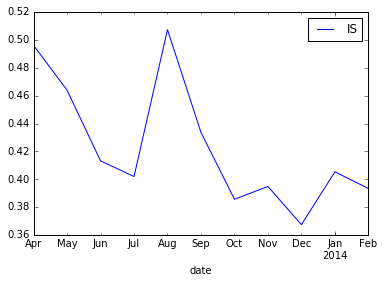

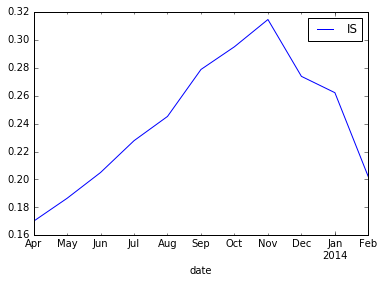

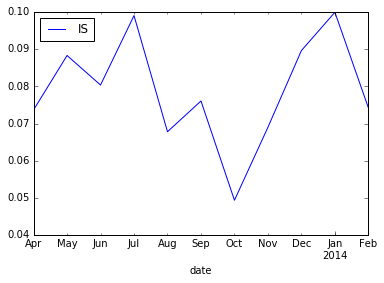

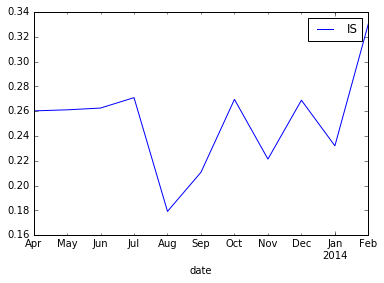

In [13]:
# -*- coding: utf-8 -*-
"""
For Calculating information share on 
This is a temporary infoscript file.
"""

import pandas as pd
import numpy as np
from datetime import datetime as dt
import glob
import os
import datetime as dt
import matplotlib.pyplot as plt
import scipy.optimize as optimize


#%% import data
file = 'dated/four_exc.csv'

data = pd.read_csv(file, date_parser=['date'])
data['date'] = pd.to_datetime(data['date'])
data.sort_values(by='date', inplace=True, ascending=False)

### p1 : mtgox
### p2 : btce
### p3 : bitstamp
### p4 : bitfinex
new_column={'p_mtgoxUSD': 'p1', 'p_btceUSD':'p2', 'p_bitstampUSD':'p3', 'p_bitfinexUSD':'p4',
            'v_mtgoxUSD': 'v1', 'v_btceUSD':'v2', 'v_bitstampUSD':'v3', 'v_bitfinexUSD':'v4' }
data.rename(columns=new_column, inplace= True)


#%% Market price formation
price_data = data
price_data['m_for_p1'] = (price_data['p2'] + price_data['p3'] + price_data['p4']) / 3
price_data['m_for_p2'] = (price_data['p1'] + price_data['p3'] + price_data['p4']) / 3
price_data['m_for_p3'] = (price_data['p1'] + price_data['p2'] + price_data['p4']) / 3
price_data['m_for_p4'] = (price_data['p1'] + price_data['p2'] + price_data['p3']) / 3
price_data.set_index('date', inplace=True, drop=True)


#%% Initialze full dataframe for the monthly information share
col = ['date', 'rho_ii','pi','sigma',
       'E[yj_t,i_t-1]', 'E[yj_t,i_t]',
        'gamma_i', 'gamma_j',
        'psi_i', 'psi_j',
        'omega_i_j', 'omega^e_i',
        'IS', 'IS/AS']

df_full = pd.DataFrame(columns=col)


#%% Calculate IS
data_monthly = price_data.groupby(pd.TimeGrouper('1M'))

for name, price_data in data_monthly:
#    print(name)
#    price_data.reset_index(inplace=True, drop=True)
#    price_data.sort_values(by='date', inplace=True, ascending=False)
    
    # Calculate lag variables of price difference
    for i in range(1,5):
        price_data['p'+str(i)] = np.log(price_data['p'+str(i)])
        price_data['diff_p'+str(i)] = price_data['p'+str(i)] - price_data['p'+str(i)].shift(-1)
        price_data['diff_lag1_p'+str(i)] = price_data['diff_p'+str(i)].shift(-1)
        price_data['diff_lag2_p'+str(i)] = price_data['diff_lag1_p'+str(i)].shift(-1)

        price_data['m_for_p'+str(i)] = np.log(price_data['m_for_p'+str(i)]) 
        price_data['diff_m_for_p'+str(i)] = price_data['m_for_p'+str(i)] - price_data['m_for_p'+str(i)].shift(-1)
        price_data['diff_lag1_m_for_p'+str(i)] = price_data['diff_m_for_p'+str(i)].shift(-1)
        price_data['diff_lag2_m_for_p'+str(i)] = price_data['diff_lag1_m_for_p'+str(i)].shift(-1)

    price_data.fillna(method='ffill',inplace=True)

    E_yj_yi = []
    E_yj_yi_lag1_t = []
    E_yj_yi_lag2_t = []
    E_yi_yj_lag2_t = []
    rho = []
    
    # calculate E[yj_t,i_t], E[yj_t,i_t-1], rho_ii
    for i in range(1,5):
        diff = price_data[['diff_m_for_p'+str(i),'diff_p'+str(i)]]
        E_yj_yi.append(np.cov(diff.T)[0,1])

        diff = price_data[['diff_m_for_p'+str(i),'diff_lag1_p'+str(i)]]
        E_yj_yi_lag1_t.append(np.cov(diff.T)[0,1])

        diff = price_data[['diff_m_for_p'+str(i),'diff_lag2_p'+str(i)]]
        E_yj_yi_lag2_t.append(np.cov(diff.T)[0,1])

        diff = price_data[['diff_p'+str(i), 'diff_lag2_m_for_p'+str(i)]]
        E_yi_yj_lag2_t.append(np.cov(diff.T)[1,1])

        rho.append(price_data['diff_p'+str(i)].autocorr(-1))

    E_yj_yi = np.array(E_yj_yi)
    E_yj_yi_lag1_t = np.array(E_yj_yi_lag1_t)
    gamma_j = -np.array(E_yj_yi_lag2_t)
    gamma_i = -np.array(E_yi_yj_lag2_t)
    rho = np.array(rho)

    # Calculate pi
    trading_volume = price_data.loc[:,['v1','v2','v3','v4']]
    v_sum = trading_volume.mean(axis=0)
    pi = v_sum / v_sum.sum(axis=0)
    pi = np.array(pi)
    
#    column = {'E[yj_t,i_t]', 'E[yj_t,i_t-1]','rho_ii'}
    df = pd.DataFrame()
    df['E[yj_t,i_t]'] = E_yj_yi
    df['E[yj_t,i_t-1]'] = E_yj_yi_lag1_t
    df['rho_ii'] = rho
    df['sigma'] = price_data[['diff_p1','diff_p2','diff_p3','diff_p4']].var().mean()
    df['gamma_i'] = gamma_i
    df['gamma_j'] = gamma_j
    df['pi'] = pi

    #### from paper ####
#     pi_paper = np.array([0.352,0.240,0.215,0.109])
#     df['pi'] = pi_paper/pi_paper.sum()

    
    # Define opmization constraints and objective function
    def toVector(x_mat):
        return x_mat.reshape(16,1)
    
    def constraint0(x):
        sum_value1 = 0
        for i in range(0,4):
            sum_value1 += (1 + (x[4*i]/df['sigma'][i])) * df['pi'][i] 
        return sum_value1 - 1
    
    def objective(x):
        sum_value = 0
        for i in range(0,4):
            sum_value += abs(x[4*i]*df['pi'][i])
        return sum_value
    
    def constraint1(x):
        sum_up1 = 0
        for i in range(0,4):
            sum_up1 += abs(2*x[4*i+2] + x[4*i+1] + x[4*i] + df['sigma'][i] - df['E[yj_t,i_t]'][i])
        return sum_up1
    
    def constraint2(x):
        sum_up2 = 0
        for i in range(0,4):
            sum_up2 += abs(x[4*i+1] + x[4*i+2] + df['E[yj_t,i_t-1]'][i]  - df['gamma_j'][i])
        return sum_up2
    
    def constraint3(x):
        sum_up3 = 0
        for i in range(0,4):
            sum_up3 += abs(((x[4*i+3] + x[4*i+0] - df['gamma_i'][i])/(df['sigma'][i] + 2*(x[4*i+3]+x[4*i+0]))) + df['rho_ii'][i])
        return sum_up3
    
    def constraint4(x):   
        return x[3]
    
    def constraint5(x):   
        return x[7]
    
    def constraint6(x):   
        return x[11]
    
    def constraint7(x):   
        return x[15]

    #### initialization unknown variables
    # x0, x4, x8, x12  => psi_i
    # x1, x5, x9, x13  => psi_j
    # x2, x6, x10, x14 => omega_ij
    # x3, x7, x11, x15 => omega^e_i
    x0 = np.zeros([4,4])
    for i in range(4):
        for j in range(4):
            x0[i,j] = np.random.rand()*(10**-5)        

    con0 = {'type': 'eq', 'fun': constraint0} 
    con1 = {'type': 'eq', 'fun': constraint1} 
    con2 = {'type': 'eq', 'fun': constraint2}
    con3 = {'type': 'eq', 'fun': constraint3} 

    con4 = {'type': 'ineq', 'fun': constraint4}
    con5 = {'type': 'ineq', 'fun': constraint5}
    con6 = {'type': 'ineq', 'fun': constraint6}
    con7 = {'type': 'ineq', 'fun': constraint7}

    cons = ([con0, con1, con2, con3, con4, con5, con6, con7])

    solution = optimize.minimize(fun=objective, x0=toVector(x0), options={'disp': True}, constraints=cons, method='BFGS', tol=1e-9)
    sol = solution.x.reshape(4,4)

    df['psi_i'] = sol[:,0]
    df['psi_j'] = sol[:,1]
    df['omega_i_j'] = sol[:,2]
    df['omega^e_i'] = sol[:,3]

    df['IS'] = (1 + df['psi_i']/df['sigma']) * df['pi']
    df['IS/AS'] = df['IS']/df['pi']
    df['date'] = name
    df['exchange'] = np.array(['mtgox', 'btce' , 'bitstamp', 'bitfinex'])
            
    df_full = df_full.append(df, ignore_index=False)
    
    del df, diff, price_data, E_yj_yi, E_yj_yi_lag1_t, E_yj_yi_lag2_t, E_yi_yj_lag2_t, rho, pi, trading_volume, gamma_i, gamma_j, sol, solution, v_sum, x0 
    
    
#%% Plot price difference

df_full.groupby(by='exchange').plot(x='date', y='IS',kind='line')

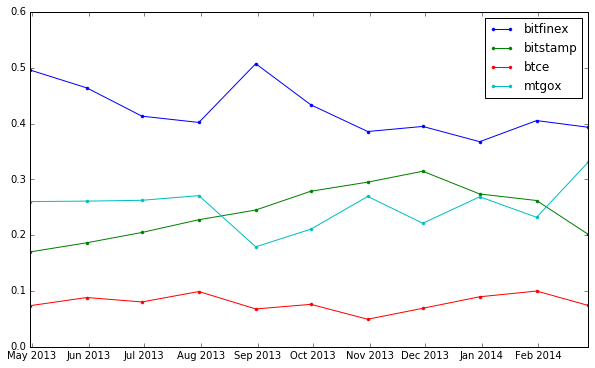

In [22]:
%matplotlib inline
plt.subplots(figsize=(10,6))
for index, group in df_full.groupby(by='exchange'):
    plt.hold
    plt.plot(group['date'],group['IS'], '.-')
plt.legend(['bitfinex','bitstamp','btce','mtgox'])